In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})


In [2]:
# Loading the data
raw_data = pd.read_csv('clustering.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(381, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [3]:
# Checking for null values

raw_data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Visualize the NULL observations
raw_data[raw_data['Loan_Amount_Term'].isnull()]
raw_data[raw_data['Gender'].isnull()]
raw_data[raw_data['Dependents'].isnull()]
raw_data[raw_data['Credit_History'].isnull()]
raw_data[raw_data['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
20,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
72,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
75,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
76,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
96,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
103,LP001581,Male,Yes,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural,Y
134,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
142,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


In [5]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Loan_Amount_Term'])
raw_data = raw_data.dropna(subset = ['Gender'])
raw_data = raw_data.dropna(subset = ['Dependents'])
raw_data = raw_data.dropna(subset = ['Credit_History'])
raw_data = raw_data.dropna(subset = ['Self_Employed'])
# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(308, 13)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# Getting the columns we need
raw_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

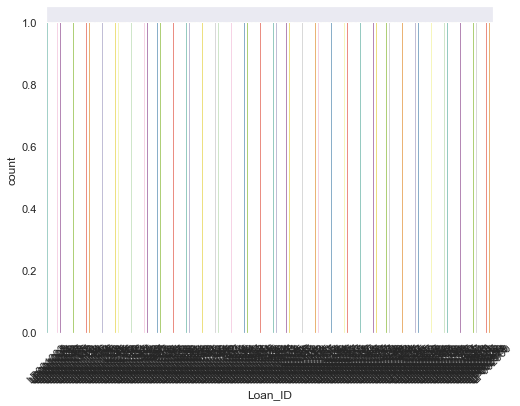

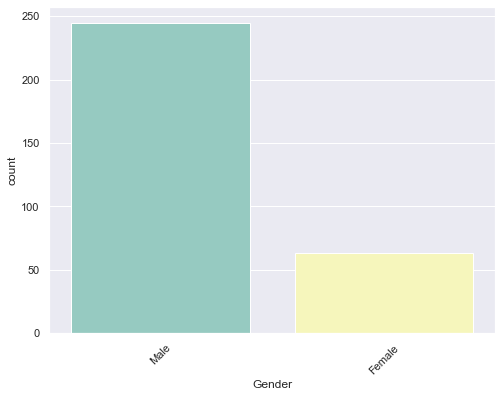

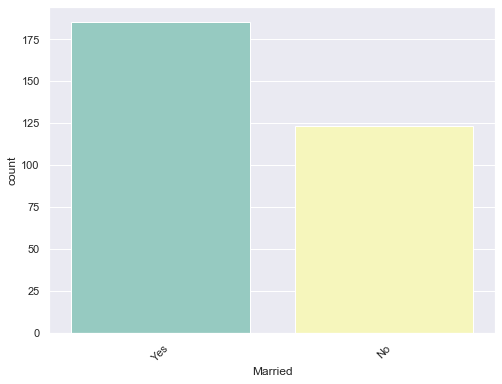

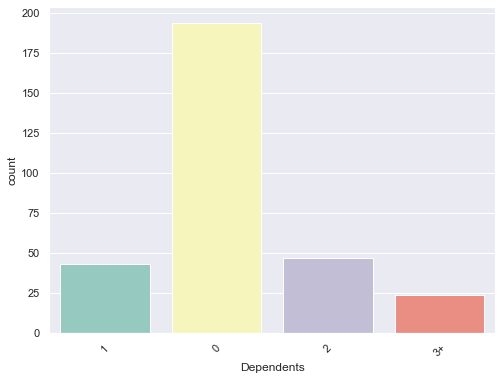

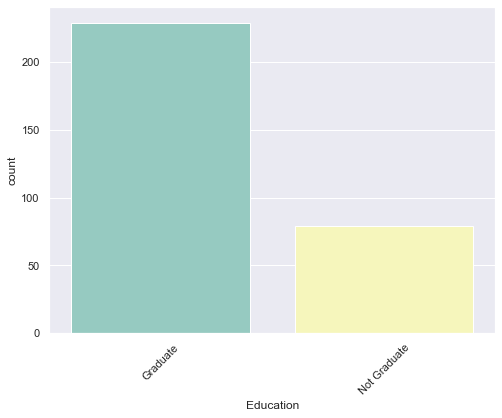

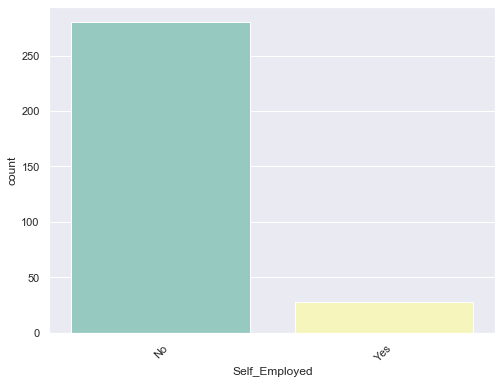

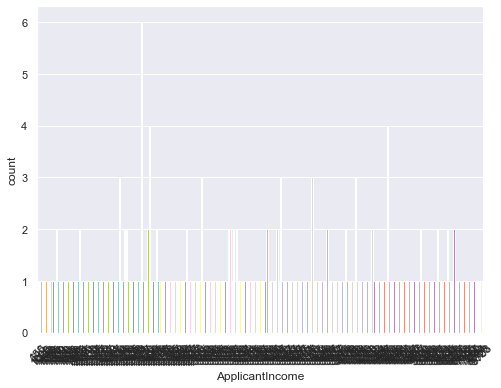

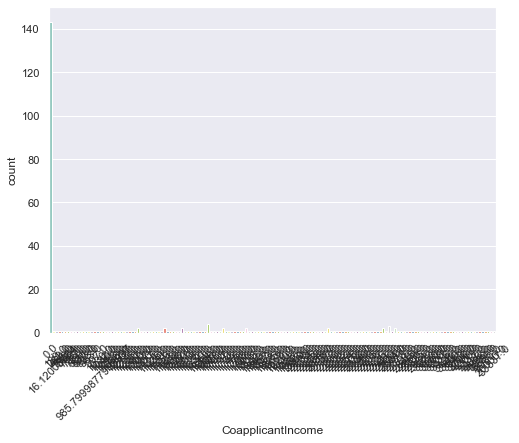

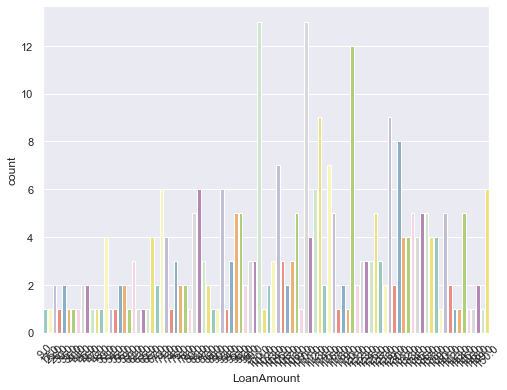

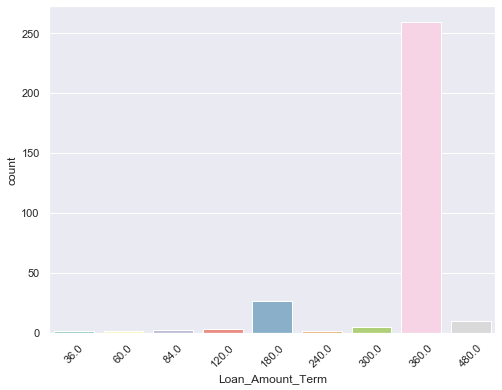

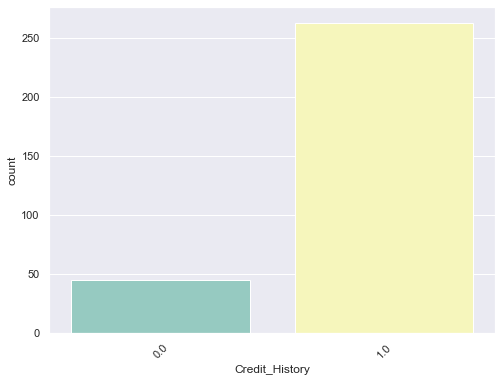

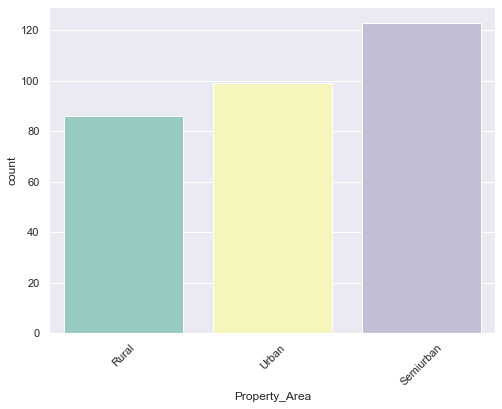

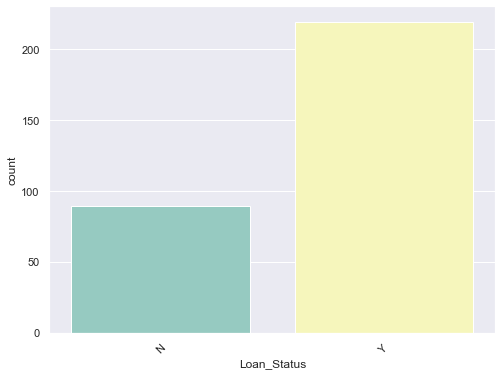

In [7]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering - Numeric Representation

In [8]:

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = raw_data[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(308, 13)
(308, 13)
(308, 852)


,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001013,Loan_ID_LP001024,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001036,...,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [9]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# K-means Clustering

In [10]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [3 1 1 2 1 1 3 1 2 0 3 3 3 4 1 3 3 3 4 4 2 3 2 4 1 1 3 0 4 0 0 1 4 4 3 1 1
 1 0 3 1 0 4 2 3 1 0 1 2 4 4 1 2 2 4 4 4 4 1 1 4 2 0 0 4 2 2 4 2 0 1 3 4 4
 1 4 3 3 2 4 3 1 0 1 3 3 3 1 1 4 3 4 4 3 2 2 2 4 1 4 0 0 2 2 2 3 1 1 4 3 4
 3 4 2 4 4 4 0 4 1 3 1 4 3 1 1 4 1 0 2 3 1 2 0 2 4 0 0 2 4 4 4 1 4 1 0 2 0
 1 0 1 3 1 1 1 3 0 1 2 0 0 0 2 0 1 4 4 4 2 0 0 1 2 0 0 4 1 1 3 4 1 3 0 1 2
 3 3 3 1 1 3 1 2 1 2 1 1 4 1 0 1 2 0 3 3 2 0 0 1 0 0 1 0 1 4 1 1 1 0 4 1 2
 0 3 4 2 2 0 2 1 1 3 3 3 1 2 4 1 2 1 3 2 3 1 3 4 1 4 1 3 3 2 3 4 1 4 0 0 4
 3 1 4 1 4 0 4 2 1 4 2 2 1 3 2 3 4 0 1 3 2 0 1 3 4 4 2 2 3 0 3 4 1 2 1 3 4
 3 1 0 3 4 1 2 1 1 0 1 0]
The Inertia is:  1823.5869504937252


In [11]:
kmeans.labels_.shape

(308,)

In [12]:
# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 2043.5909645909649
The innertia for : 3 Clusters is: 1942.2220352893735
The innertia for : 4 Clusters is: 1879.4436323919485
The innertia for : 5 Clusters is: 1822.3665834418694
The innertia for : 6 Clusters is: 1778.8288863998782
The innertia for : 7 Clusters is: 1751.1793145171246
The innertia for : 8 Clusters is: 1712.3713177154514
The innertia for : 9 Clusters is: 1703.2247233620787
The innertia for : 10 Clusters is: 1664.9482937241555
The innertia for : 11 Clusters is: 1649.755390066588
The innertia for : 12 Clusters is: 1623.0904644268774
The innertia for : 13 Clusters is: 1608.0874066495037
The innertia for : 14 Clusters is: 1590.191782952646
The innertia for : 15 Clusters is: 1580.2740058313088
The innertia for : 16 Clusters is: 1547.8444814007094
The innertia for : 17 Clusters is: 1540.432508091721
The innertia for : 18 Clusters is: 1529.1664278822357
The innertia for : 19 Clusters is: 1518.9785128664444


In [13]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

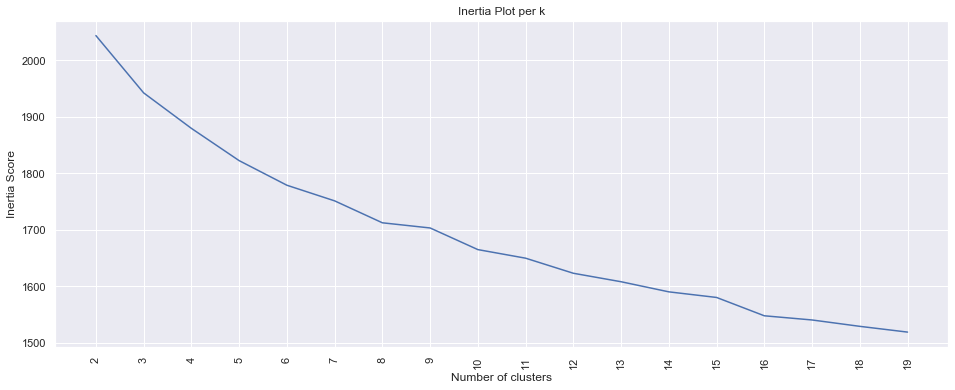

In [14]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [15]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,65,83,49,34,77


In [16]:
kmeans.labels_

array([3, 1, 1, 4, 1, 1, 2, 1, 4, 2, 3, 3, 3, 0, 1, 2, 2, 2, 0, 0, 4, 2,
       4, 0, 1, 1, 2, 4, 0, 4, 2, 1, 0, 0, 3, 1, 1, 1, 2, 2, 1, 2, 0, 4,
       2, 1, 4, 1, 4, 0, 0, 1, 4, 4, 0, 0, 0, 0, 1, 1, 0, 4, 4, 4, 0, 4,
       4, 0, 4, 2, 1, 3, 0, 0, 1, 0, 2, 3, 4, 0, 3, 1, 2, 1, 2, 3, 3, 1,
       1, 0, 2, 0, 0, 3, 4, 4, 4, 0, 1, 0, 4, 4, 4, 4, 2, 3, 1, 1, 0, 3,
       0, 3, 0, 4, 0, 0, 0, 4, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1, 2, 4, 2, 1,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 1, 0, 1, 4, 4, 2, 1, 4, 1, 3, 1, 1,
       1, 3, 4, 1, 4, 4, 2, 4, 4, 4, 1, 0, 0, 0, 4, 2, 4, 1, 4, 4, 2, 0,
       1, 1, 2, 0, 1, 3, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 4, 1, 4, 1, 1, 0,
       1, 2, 1, 4, 2, 3, 2, 4, 4, 4, 1, 4, 2, 1, 4, 1, 0, 1, 1, 1, 2, 0,
       1, 4, 4, 2, 0, 4, 4, 4, 0, 1, 1, 3, 3, 3, 3, 4, 0, 1, 4, 1, 2, 4,
       3, 1, 3, 0, 1, 0, 1, 2, 2, 4, 3, 0, 1, 0, 4, 4, 0, 2, 1, 3, 1, 0,
       2, 0, 4, 1, 0, 0, 4, 1, 2, 4, 3, 0, 2, 1, 2, 4, 2, 1, 3, 0, 0, 4,
       4, 3, 2, 3, 3, 1, 4, 1, 2, 0, 3, 1, 4, 3, 0,

In [17]:
predictions

array([3, 1, 1, 4, 1, 1, 2, 1, 4, 2, 3, 3, 3, 0, 1, 2, 2, 2, 0, 0, 4, 2,
       4, 0, 1, 1, 2, 4, 0, 4, 2, 1, 0, 0, 3, 1, 1, 1, 2, 2, 1, 2, 0, 4,
       2, 1, 4, 1, 4, 0, 0, 1, 4, 4, 0, 0, 0, 0, 1, 1, 0, 4, 4, 4, 0, 4,
       4, 0, 4, 2, 1, 3, 0, 0, 1, 0, 2, 3, 4, 0, 3, 1, 2, 1, 2, 3, 3, 1,
       1, 0, 2, 0, 0, 3, 4, 4, 4, 0, 1, 0, 4, 4, 4, 4, 2, 3, 1, 1, 0, 3,
       0, 3, 0, 4, 0, 0, 0, 4, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1, 2, 4, 2, 1,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 1, 0, 1, 4, 4, 2, 1, 4, 1, 3, 1, 1,
       1, 3, 4, 1, 4, 4, 2, 4, 4, 4, 1, 0, 0, 0, 4, 2, 4, 1, 4, 4, 2, 0,
       1, 1, 2, 0, 1, 3, 2, 1, 4, 2, 2, 2, 1, 1, 2, 1, 4, 1, 4, 1, 1, 0,
       1, 2, 1, 4, 2, 3, 2, 4, 4, 4, 1, 4, 2, 1, 4, 1, 0, 1, 1, 1, 2, 0,
       1, 4, 4, 2, 0, 4, 4, 4, 0, 1, 1, 3, 3, 3, 3, 4, 0, 1, 4, 1, 2, 4,
       3, 1, 3, 0, 1, 0, 1, 2, 2, 4, 3, 0, 1, 0, 4, 4, 0, 2, 1, 3, 1, 0,
       2, 0, 4, 1, 0, 0, 4, 1, 2, 4, 3, 0, 2, 1, 2, 4, 2, 1, 3, 0, 0, 4,
       4, 3, 2, 3, 3, 1, 4, 1, 2, 0, 3, 1, 4, 3, 0,

In [18]:
new_raw_data.shape

(308, 852)

Explained variance ratio : [0.102415 0.078845 0.055332 0.049046 0.043439 0.038976 0.033276 0.025606
 0.025202 0.023376]


<Figure size 576x432 with 0 Axes>

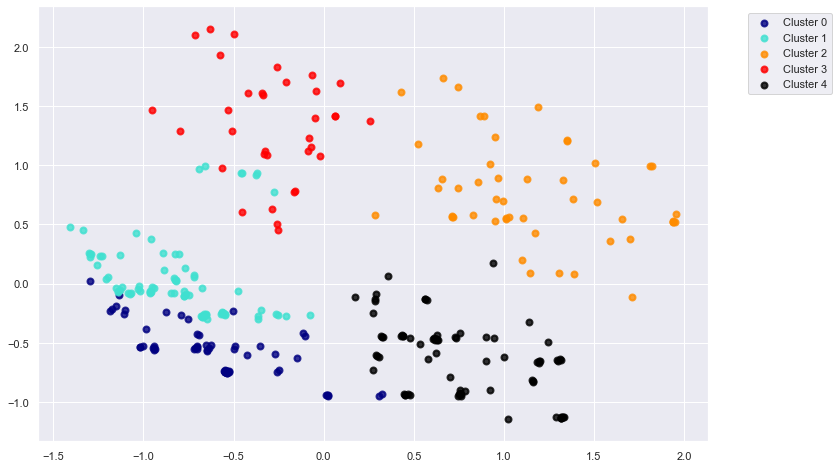

In [19]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=10, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio : %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red','black' ]
lw = 2


for color, i, target_name in zip(colors, [0,1,2,3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.show()

The innertia for : 2 Clusters is: 1314.9115172115623
The innertia for : 3 Clusters is: 1214.5842814671428
The innertia for : 4 Clusters is: 1148.4649353554405
The innertia for : 5 Clusters is: 1106.3738483241705
The innertia for : 6 Clusters is: 1054.839432183991
The innertia for : 7 Clusters is: 1024.7261763017223
The innertia for : 8 Clusters is: 985.0932009507571
The innertia for : 9 Clusters is: 978.0832749347571
The innertia for : 10 Clusters is: 950.9597405971444
The innertia for : 11 Clusters is: 923.2883464269134
The innertia for : 12 Clusters is: 912.5363024091306
The innertia for : 13 Clusters is: 886.5818063353788
The innertia for : 14 Clusters is: 865.895532456064
The innertia for : 15 Clusters is: 857.0535410580787
The innertia for : 16 Clusters is: 842.5282949891439
The innertia for : 17 Clusters is: 827.7202156205739
The innertia for : 18 Clusters is: 812.4734012569079
The innertia for : 19 Clusters is: 790.0951131679574


Text(0.5, 1.0, 'Inertia Plot per k')

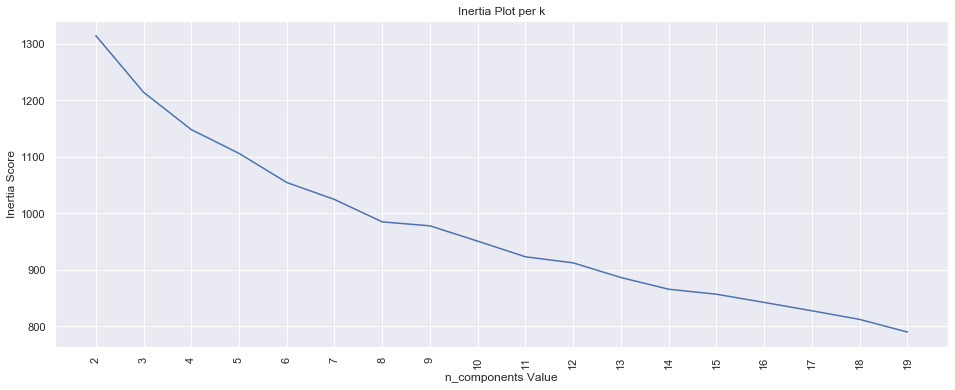

In [20]:
# Running PCA 

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

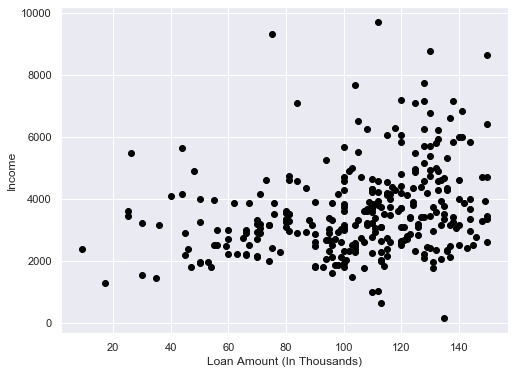

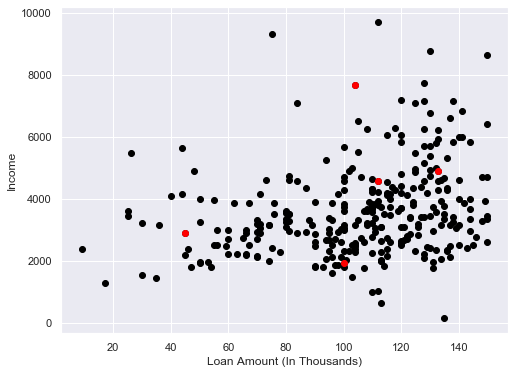

In [21]:
X = raw_data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
#Visualise data points
plt.scatter(X["LoanAmount"],X["ApplicantIncome"],c='black')
plt.ylabel('Income')
plt.xlabel('Loan Amount (In Thousands)')
plt.show()

K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["LoanAmount"],X["ApplicantIncome"],c='black')
plt.scatter(Centroids["LoanAmount"],Centroids["ApplicantIncome"],c='red')
plt.ylabel('Income')
plt.xlabel('Loan Amount (In Thousands)')
plt.show()


In [22]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d2=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["ApplicantIncome","LoanAmount"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum() + (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["ApplicantIncome","LoanAmount"]]

369.69660546618616
162.14941818214652
237.99284612867723
119.03042224182803
229.04541637176692
149.81712598529634
12.29406616590137
11.404616461969155
12.30373603190057
11.35589976598851
0.0


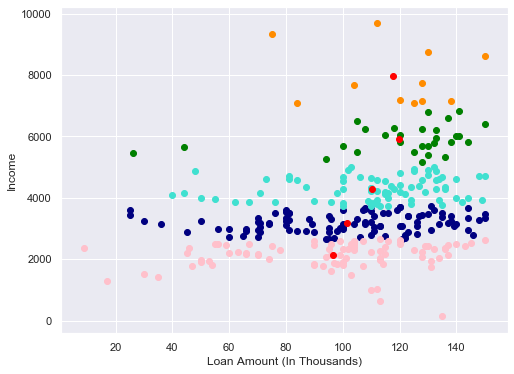

In [23]:
color=['navy', 'turquoise', 'darkorange', 'green', 'pink']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["LoanAmount"],data["ApplicantIncome"],c=color[k])
plt.scatter(Centroids["LoanAmount"],Centroids["ApplicantIncome"],c='red')
plt.ylabel('Income')
plt.xlabel('Loan Amount (In Thousands)')
plt.show()